# 第11章　季節性とマクロ変数を加える?
## 11.3 季節性の具体例

In [50]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
n225 = pdr.DataReader("NIKKEI225", 'fred',"1949/5/16",end).dropna()
develop=n225.ix[:'1989/12/31']
reform=n225.ix['1989/12/31':]
year=n225.ix['1989']
years=[x+1950 for x in range(66)]
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [51]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
alpha=0.1
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0 and years[i]>=1990:
            count[j]+=1
print(count)
print(t0)

[2, 3, 2, 2, 4, 2, 2, 1, 5, 1, 3, 4]
1.36343031802


In [52]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])>t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[24, 15, 14, 9, 14, 10, 9, 14, 16, 9, 14, 15]


In [53]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0:# and years[i]>=1990:
            count[j]+=1
print(count)

[2, 5, 5, 2, 9, 4, 6, 6, 5, 4, 7, 3]


In [54]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
m=lambda x:x.month
count=[0]*12
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([m])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(12):
        if float(tv.iloc[j])<t0 and years[i]>=1990:
            count[j]+=1
print(count)

[1, 2, 2, 0, 4, 2, 2, 2, 3, 0, 3, 1]


In [55]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0:
            count[j]+=1
print(count)

[15, 17, 14, 13, 10]


In [56]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])>t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


In [57]:
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0:
            count[j]+=1
print(count)

[7, 10, 5, 3, 7]


In [58]:
from scipy.stats import t
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
w=lambda x:x.week
count=[0]*5
for i in range(len(years)):
    year=n225.ix[str(years[i])]
    r=year.pct_change().groupby([w])
    tv=r.mean()/r.std()*np.sqrt(r.count())
    t0=-t.ppf(1-alpha,len(r)-1)
    for j in range(5):
        if float(tv.iloc[j])<t0 and years[j]>1990:
            count[j]+=1
print(count)

[0, 0, 0, 0, 0]


## 11.4 マクロ変数との関係(単回帰と多変量解析)

In [59]:
import pandas_datareader.data as pdr
import numpy as np
start='1971/12/1'
end='2016/8/31'
workpop = pdr.DataReader('LFWA64TTJPM647S',"fred",start,end).dropna()
gdp = pdr.DataReader('MKTGDPJPA646NWDB',"fred",start,end).dropna()
gdp=gdp.resample('A',loffset='-1d').last().dropna()
fx = pdr.DataReader('DEXJPUS',"fred",start,end).dropna()
fx=fx.resample('A',loffset='-1d').last().dropna()
workpop=workpop['1972':].resample('A',loffset='-1d').last().dropna()
gdpjpy=gdp.MKTGDPJPA646NWDB*fx.DEXJPUS
gdpjpy=np.log(gdpjpy).dropna()
workpop=np.log(workpop).dropna()

In [60]:
import statsmodels.api as sm
x=sm.add_constant(workpop)
model=sm.OLS(gdpjpy,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     65.13
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           4.47e-10
Time:                        20:11:00   Log-Likelihood:                -8.2540
No. Observations:                  44   AIC:                             20.51
Df Residuals:                      42   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -99.8663     16.527     

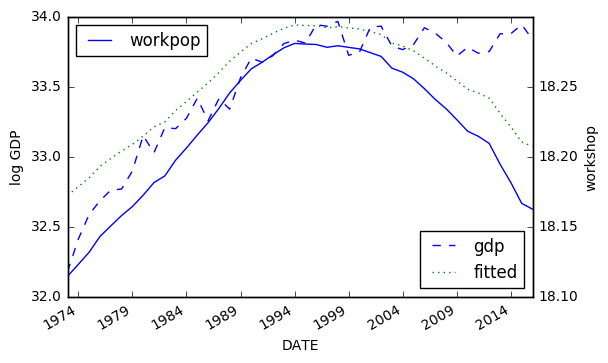

In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt
f,ax = plt.subplots()#２軸のグラフの準備
ax.plot(gdpjpy,label='gdp',linestyle="--")
ax2=ax.twinx()#２軸目をax2として設定
ax2.plot((workpop),label='workpop')#２軸目にプロット
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log GDP')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

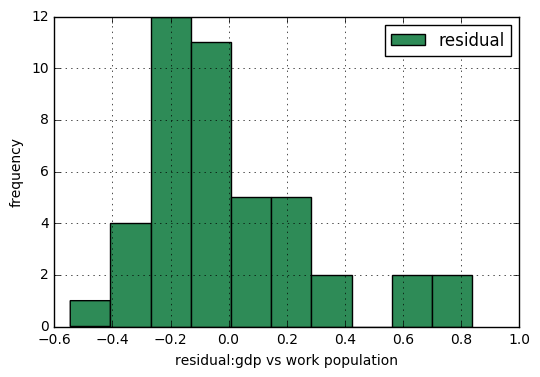

In [62]:
import matplotlib.pyplot as plt
results.resid.hist(label='residual',color='seagreen')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [63]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
port=pd.concat([lnn225,x,gdpjpy],axis=1).dropna()
port.columns=["n225","const","workpop","gdpjpy"]
model=sm.OLS(port.n225,port.ix[0:,['const','workpop','gdpjpy']])
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     34.33
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.74e-09
Time:                        20:11:03   Log-Likelihood:                -14.467
No. Observations:                  44   AIC:                             34.93
Df Residuals:                      41   BIC:                             40.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -91.9025     26.339     -3.489      0.0

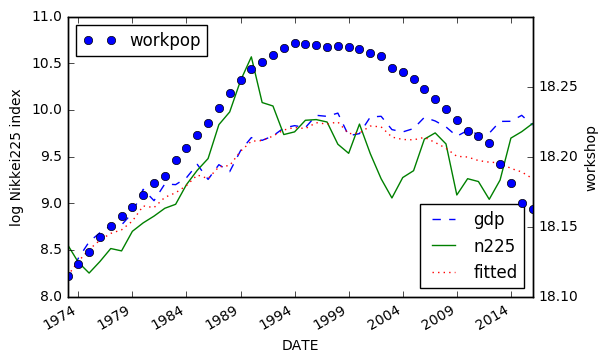

In [64]:
#多変量解析：折れ線グラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port.gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
port.n225.plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port.workpop).plot(label='workpop',ax=ax2,style='o')
results.fittedvalues.plot(label='fitted',style=':',ax=ax)
plt.legend(loc='upper left')
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

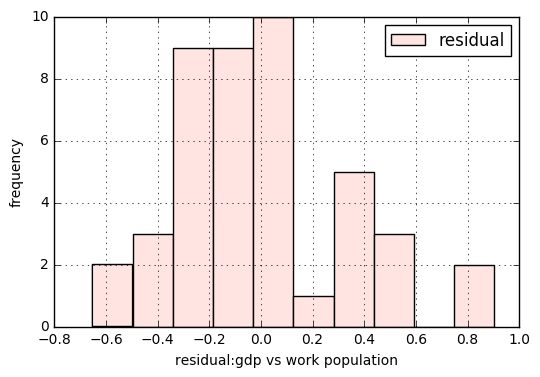

In [65]:
#多変量解析：ヒストグラム
results.resid.hist(label='residual',color='mistyrose')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [66]:
#バブル崩壊前
port_b=port[:'1990/1/1']
model_b=sm.OLS(port_b.n225,port_b.ix[0:,['const','gdpjpy','workpop']])
results_b=model_b.fit()
print(results_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           6.95e-10
Time:                        20:11:03   Log-Likelihood:                 6.7243
No. Observations:                  18   AIC:                            -7.449
Df Residuals:                      15   BIC:                            -4.778
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -381.3873     49.272     -7.740      0.0

C:\Users\moriya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


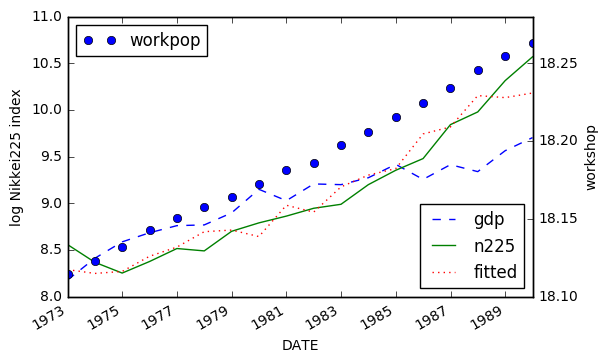

In [67]:
#バブル崩壊前のグラフ
f,ax = plt.subplots()#２軸のグラフの準備
(port[:'1990/1/1'].gdpjpy-24).plot(label='gdp',linestyle="--",ax=ax)
port[:'1990/1/1'].n225.plot(label='n225',ax=ax)
ax2=ax.twinx()#２軸目をax2として設定
(port[:'1990/1/1'].workpop).plot(label='workpop',style='o',ax=ax2)
#書籍のグラフはworkpopから8.5引いてしまっているので、こちらが正しいグラフです。
results_b.fittedvalues.plot(label='fitted',style=':',ax=ax)
ax.set_ylabel('log Nikkei225 index')#1軸目にラベルを設定
ax2.set_ylabel('workshop')#2軸目にラベルを設定
ax.legend(loc='lower right')
ax2.legend(loc='upper left')

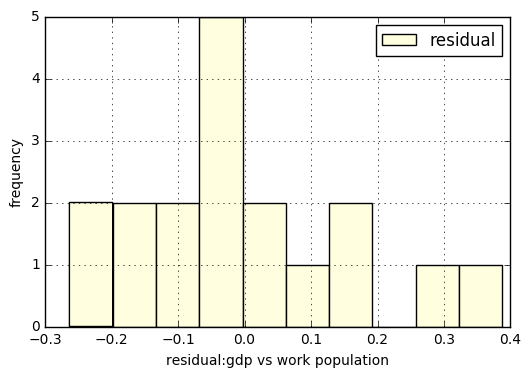

In [68]:
#バブル崩壊前：ヒストグラム
results_b.resid.hist(label='residual',color='lightyellow')
plt.xlabel('residual:gdp vs work population')
plt.ylabel('frequency')
plt.legend(loc='upper right')

In [69]:
#バブル崩壊後
port_a=port['1990/1/1':]
results_a=(sm.OLS(port_a.n225,port_a.ix[0:,['const','gdpjpy','workpop']])).fit()
print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.039
Date:                Thu, 03 Nov 2016   Prob (F-statistic):              0.370
Time:                        20:11:04   Log-Likelihood:                -4.9610
No. Observations:                  26   AIC:                             15.92
Df Residuals:                      23   BIC:                             19.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -47.9044     40.035     -1.197      0.2

In [ ]:
import pandas as pd
lnn225 = np.log(pdr.DataReader("NIKKEI225", 'fred',start,end).dropna())
lnn225=lnn225.resample('A',loffset='-1d').last().dropna()
lnfx=np.log(fx)
port1=pd.concat([lnn225,x,gdpjpy,lnfx],axis=1).dropna()
port1.columns=["n225","const","workpop","gdpjpy","fx"]
model1=sm.OLS(port1.n225,port1.ix[0:,['const','workpop','gdpjpy','fx']])
results1=model1.fit()
print(results1.summary())

In [70]:
#バブル崩壊後：要素にドル円の為替レートを追加
port1_a=port1['1990/1/1':]
results1_a=(sm.OLS(port1_a.n225,port1_a.ix[0:,['const','gdpjpy','workpop','fx']])).fit()
print(results1_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   n225   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3.434
Date:                Thu, 03 Nov 2016   Prob (F-statistic):             0.0346
Time:                        20:11:04   Log-Likelihood:                -1.0917
No. Observations:                  26   AIC:                             10.18
Df Residuals:                      22   BIC:                             15.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5734     39.218     -0.015      0.9

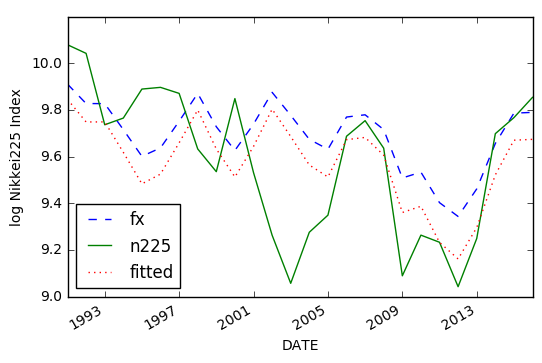

In [71]:
##バブル崩壊後のグラフ：ドル円の為替レート
(port1['1990/1/1':].fx+5).plot(label='fx',linestyle="--")
port1['1990/1/1':].n225.plot(label='n225')
results1_a.fittedvalues.plot(label='fitted',style=':')
plt.ylabel('log Nikkei225 Index')
plt.legend(loc='lower left')

In [72]:
#バブル崩壊後：細分化
def report(port):
    results1_a=(sm.OLS(port1_a.n225,port1_a.ix[0:,['const','gdpjpy','workpop','fx']]))\
    .fit()
    print("R-squared: ",results1_a.rsquared," F-pvalue: ",results1_a.f_pvalue," AIC: "\
          ,results1_a.aic," BIC: ",results1_a.bic)
    print("pvalues: ")
    print(results1_a.pvalues)
    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms
    test=sms.jarque_bera(results1_a.resid)
    print("jbpv: ",test[1])
port1_a=port1['1990/1/1':'2000/1/1']
report(port1_a)

R-squared:  0.694520165892  F-pvalue:  0.0547118070768  AIC:  -12.1319255907  BIC:  -10.9215852187
pvalues: 
const      0.012518
gdpjpy     0.133545
workpop    0.013761
fx         0.056421
dtype: float64
jbpv:  0.840884157991


In [73]:
#バブル崩壊後：細分化2
port1_a=port1['2000/1/1':'2008/1/1']
report(port1_a)

R-squared:  0.926548940777  F-pvalue:  0.00986454831986  AIC:  -13.7685628969  BIC:  -13.4507967302
pvalues: 
const      0.049117
gdpjpy     0.006289
workpop    0.006525
fx         0.058488
dtype: float64
jbpv:  0.738408350474


In [74]:
#バブル崩壊後：細分化3
port1_a=port1['2008/1/1':]
report(port1_a)

R-squared:  0.949248873098  F-pvalue:  0.00474690144074  AIC:  -12.3679775295  BIC:  -12.0502113628
pvalues: 
const      0.173036
gdpjpy     0.757946
workpop    0.114835
fx         0.051445
dtype: float64
jbpv:  0.599301684508
